<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Eduardo Loza de la Torre y Ruben Hernández Guevara.

**Fecha:** 5 de febrero del 2021.

**Expediente** : 713423, 717710 
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 2: Clase 4
https://github.com/EduardoLoza/Proyecto_Conjunto_ELoza_RHernandez

In [6]:
from functools import reduce
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy.special as sps 

# Tarea 2:

# 1. 
Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
![imagen.png](attachment:imagen.png)
Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el costo total del pedido. El producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €. 
Escribe un programa Python usando unicamente las funciones **lambda y map**.

`orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]`
           

In [2]:
orders1 = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]

In [3]:

## Solución 1 Eduardo

p=lambda x,y:x*y
def aum(value):
    if(value<100):
        value+=10
    return value
mult=list(map(aum,[p(orders1[i][2],orders1[i][3]) for i in np.arange(len(orders1))]))
mult

result=list(map(lambda x,y: (x[0],y),orders1,mult))
result

[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

In [4]:
## Solución 1 Rubén
lambda_f1 = lambda x: (x[0], x[2] * x[3]) #Toma el primer elemento y multiplica Quantity*Price
lambda_f2 = lambda x: x if x[1] >= 100 else (x[0], x[1] + 10) #Aumenta 10 si la orden es menor a 100

orden1 = list(map(lambda_f2, map(lambda_f1, orders1)))
orden1

[('34587', 163.8),
 ('98762', 284.0),
 ('77226', 108.85000000000001),
 ('88112', 84.97)]

# 2.
La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 

`orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]`

Escriba un programa que devuelva una lista de dos tuplas que tengan la información de (número de pedido, cantidad total de pedido). Utilice la función `Reduce`. Recuerde el precio del pedido del producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €.



In [13]:
orders2 = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
          [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
          [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
          [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]

In [17]:
## Solución 2 Eduardo
total = list(map(lambda i: i if i[1]>=100 else (i[0],i[1]+10),
               map(lambda x:(x[0],reduce(lambda a,b:a+b,list(map(lambda y:y[1]*y[2] ,x[1:])))),orders2)))

print (total)

[(1, 678.3299999999999), (2, 494.46000000000004), (3, 364.79999999999995), (4, 492.57)]


In [7]:
## Solución 2 Ruben
sol = list(map(lambda k: k if k[1]>=100 else (k[0],k[1]+10),
               map(lambda x:(x[0],reduce(lambda a,b:a+b,list(map(lambda y:y[1]*y[2] ,x[1:])))),orders2)))
sol

[(1, 678.3299999999999),
 (2, 494.46000000000004),
 (3, 364.79999999999995),
 (4, 492.57)]

3. Resolver los anteriores ejercicios usando pandas (DataFrame)

In [10]:
## Solución 3 Eduardo
#Ejercicio 1
df1=pd.DataFrame(columns=["Order number","Book Title and Author","Quantity","Price per Item"], data=orders1)
res3_1=[(df1.iloc[:,-2]*df1.iloc[:,-1]).apply(lambda x: x if x>=100 else (x+10))]
res3_1=pd.DataFrame(res3_1)
res3_1=res3_1.append(df1.iloc[:,0])
print(res3_1.T)
#Ejercicio 2
orders2 = [[1, "5464", 4, 9.99, "8274",18,12.99, "9744", 9, 44.95], 
           [2, "5464", 9, 9.99, "9744", 9, 44.95, 0,0,0],
           [3, "5464", 9, 9.99, "88112", 11, 24.99, 0,0,0],
           [4, "8732", 7, 11.99, "7733",11,18.99, "88112", 5, 39.95]]
df2=pd.DataFrame(orders2)

res3_2= [((df2.iloc[:,2]*df2.iloc[:,3])+(df2.iloc[:,5]*df2.iloc[:,6])+(df2.iloc[:,8]*df2.iloc[:,9])).apply(lambda x: x if x>=100 else (x+10))]
res3_2

        0 Order number
0   163.8        34587
1     284        98762
2  108.85        77226
3   84.97        88112


[0    678.33
 1    494.46
 2    364.80
 3    492.57
 dtype: float64]

In [11]:
## Solución 3 Rubén
#1
sol3_1=[(df1.iloc[:,-2]*df1.iloc[:,-1]).apply(lambda x: x if x>=100 else (x+10))]
sol3_1=pd.DataFrame(sol3_1)
sol3_1=sol3_1.append(df1.iloc[:,0])
print(res3_1.T)
#2
sol3_2= [((df2.iloc[:,2]*df2.iloc[:,3])+(df2.iloc[:,5]*df2.iloc[:,6])+(df2.iloc[:,8]*df2.iloc[:,9])).apply(lambda x: x if x>=100 else (x+10))]
sol3_2

        0 Order number
0   163.8        34587
1     284        98762
2  108.85        77226
3   84.97        88112


[0    678.33
 1    494.46
 2    364.80
 3    492.57
 dtype: float64]

# 4.
Use filter to eliminate all words that are shorter than 4 letters from a list of words
`list='the notion of a lambda function goes all the way back to the origin of computer science'`

In [2]:
## Solución 4 Eduardo
# 4 Eduardo
lista ='the notion of a lambda function goes all the way back to the origin of computer science'.split()
lista

res = filter((lambda x: len(x) >= 4), lista)
print(list(res))

['notion', 'lambda', 'function', 'goes', 'back', 'origin', 'computer', 'science']


In [6]:
## Solución 4 Rubén
words = "the notion of a lambda function goes all the way back to the origin of computer science"
fun_del_minor_4 = lambda x: len(x) >= 4 #Discrimina las palabras que tengan menos de 4 letras
x = list(filter(fun_del_minor_4, words.split()))
x

['notion',
 'lambda',
 'function',
 'goes',
 'back',
 'origin',
 'computer',
 'science']

# 5.
Use filter to determine the percentage of Fahrenheit temperatures in a list are within the range 32 to 80

In [8]:
## Solución 5 Eduardo
temperatures = np.random.uniform(25,110,30)
lista= filter(lambda x:x>=32 and x<=80,temperatures)
print(temperatures)
print('El porcentaje de temperaturas entre 32 y 80 es: %.2f porciento' %((len(list(lista))/len(temperatures))*100))

[100.75749203  57.99590723  76.05806577  28.64694552 109.42749183
 108.17883723 107.14585475  69.38668289  70.62190923  54.83448096
  61.77402112  30.1596678   82.22145894 102.50336262  89.59396915
  81.89093605  88.71870817  95.4117635   98.20217446  63.09202878
  93.94016139  31.83015673  43.36638079  57.23398628  80.99142761
  43.6480719   26.67158013  94.94333881  34.41081883  45.42313135]
El porcentaje de temperaturas entre 32 y 80 es: 40.00 porciento


In [9]:
## Solución 5 Rubén
temp_range = lambda x: 32 <= x <= 80 #Almacena los valores que estén entre el rango
temp = len(list(filter(temp_range, temperatures)))/len(temperatures)
temp

0.4

# 6.
Use reduce to find the lower left corner (minimum x and minimum y value) for a list of point locations
> **Hint**: Explore the command `np.minimum.reduce` [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ufunc.reduce.html)

In [11]:
point_xy = np.random.randint(0,100,[30,2])
print(point_xy)
## Solución 6 Eduardo
x = np.minimum.reduce(point_xy)
x

[[63 39]
 [28 29]
 [50 43]
 [57 84]
 [34 12]
 [11 31]
 [41 52]
 [51 74]
 [53 56]
 [91 31]
 [36 12]
 [29 61]
 [62 78]
 [ 7 83]
 [39 22]
 [44 62]
 [89 58]
 [63 38]
 [47 60]
 [67 16]
 [57 98]
 [41 94]
 [80 36]
 [20 21]
 [77 45]
 [24 84]
 [75 50]
 [89 60]
 [ 7 25]
 [83 46]]


array([ 7, 12])

In [12]:
## Solución 6 Rubén
np.minimum.reduce(point_xy)

array([ 7, 12])

## 7
**Vectorizar distribución de poisson**
$$\textbf{Función de densidad de probabilidad}\\p(k)=\frac{\lambda^k e^{-\lambda}}{k!},\quad k\in \mathbb{N}$$

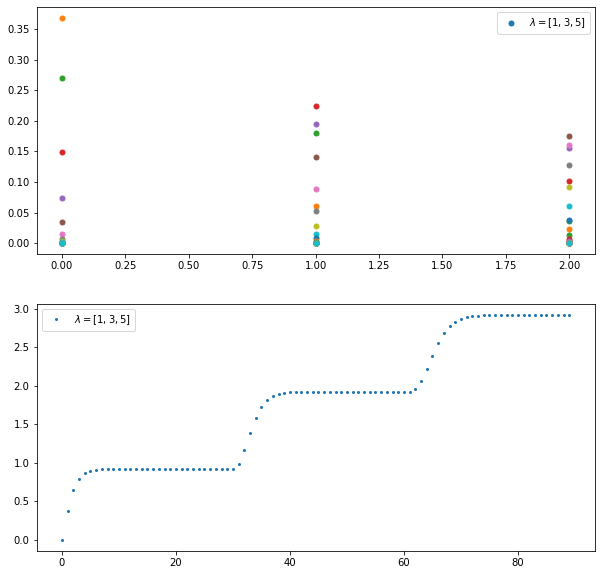

In [12]:
## Solucion Eduardo
N = 30
l = [1, 3, 5]
k = np.arange(N)

p = lambda k,l: (l**k * np.exp(-l)) / sps.factorial(k)

# Graficar para todo l una gráfica de p(k) usando subplots (como matrices)
P= np.array([p(i,k) for i in l])
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,10))
ax1.plot(P,'o',label='$\lambda$=%s' % l, markersize=5)
ax2.plot(np.cumsum(P),'o',label='$\lambda$=%s' % l, markersize=2)
#legend en latex para cada l
ax1.legend([f'$\lambda={l}$'])
ax2.legend([f'$\lambda={l}$'])

In [ ]:
## Solucion Ruben